In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Import Dataset


In [3]:
df  = pd.read_csv('/content/home_price_dataset.csv')

df.head()

,area,bedrooms,age,price
0,1700,3,2,550000
1,2100,4,11,565000
2,1500,2,18,610000
3,2100,3,3,595000
4,9000,5,5,760000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      25 non-null     int64
 1   bedrooms  25 non-null     int64
 2   age       25 non-null     int64
 3   price     25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [6]:
df.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,25.000000,25.000000,25.000000,25.000000
mean,5076.000000,4.440000,5.560000,558800.000000
std,3526.244461,2.022375,4.717697,283322.107621
min,200.000000,1.000000,0.000000,10000.000000
25%,1500.000000,3.000000,2.000000,450000.000000
50%,7000.000000,4.000000,5.000000,610000.000000
75%,8000.000000,6.000000,8.000000,800000.000000
max,9000.000000,9.000000,18.000000,900000.000000


# 2. Data Analysis

In [7]:
df.isna().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

* we can see here only bedrooms has null values

In [8]:
df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )
df.head()

,area,bedrooms,age,price
0,1700,3,2,550000
1,2100,4,11,565000
2,1500,2,18,610000
3,2100,3,3,595000
4,9000,5,5,760000


# 3. Data Visualization

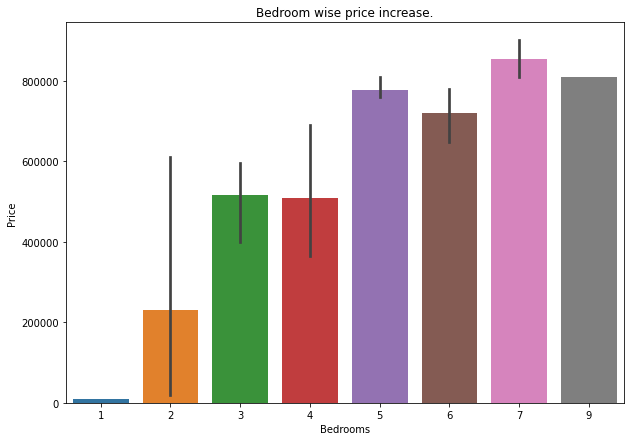

In [9]:
plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot('bedrooms', 'price', data=df)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

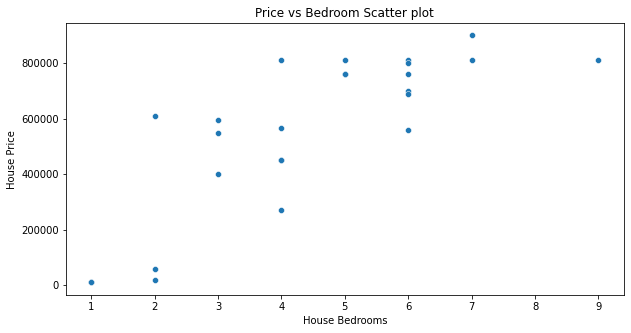

In [10]:
plt.figure(figsize=(10, 5))

sns.scatterplot('bedrooms', 'price',data=df)
plt.title("Price vs Bedroom Scatter plot")

plt.xlabel("House Bedrooms")
plt.ylabel('House Price')
plt.show()

* Here we can see bedrooms and price linearly related, House's Price increased if bedroom size will increase.

<Figure size 720x504 with 0 Axes>

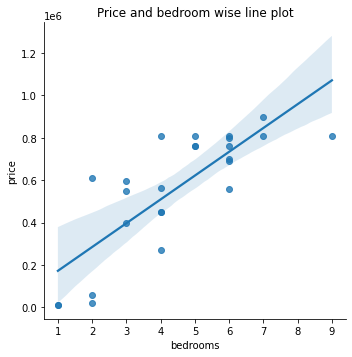

In [11]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

# 4. Model Implementing

In [12]:
from sklearn.linear_model import LinearRegression

* Now, Create model instance from LinearRegression class

In [13]:
mdl = LinearRegression()

* Before fitting the model, create X and y for model fitting

In [14]:
X = df.drop(['price'], axis=1)
y = df['price']

In [15]:
df['bedrooms'] = df['bedrooms'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      25 non-null     int64
 1   bedrooms  25 non-null     int64
 2   age       25 non-null     int64
 3   price     25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [16]:
print(X)
print("-" * 25)
print(y)

    area  bedrooms  age
0   1700         3    2
1   2100         4   11
2   1500         2   18
3   2100         3    3
4   9000         5    5
5   1200         6    8
6   9000         5    0
7   7000         4   10
8   8000         7   15
9   7000         6    8
10   500         2    6
11  7000         5    0
12  9000         6    2
13  4000         4    4
14  6000         3    7
15  9000         7    6
16   400         1    9
17  8000         4    5
18  9000         6    7
19   600         2    0
20  8000         6    1
21  9000         9    5
22   600         4    7
23   200         1    0
24  7000         6    0
-------------------------
0     550000
1     565000
2     610000
3     595000
4     760000
5     810000
6     760000
7     810000
8     900000
9     800000
10     60000
11    810000
12    700000
13    450000
14    400000
15    810000
16     10000
17    450000
18    690000
19     20000
20    560000
21    810000
22    270000
23     10000
24    760000
Name: price, dtype: int64

* Now, We are going to fitting the training and testing data

In [17]:
mdl.fit( X, y  )

LinearRegression()

# Prediction 


In [18]:
mdl.predict([[ 4000, 2, 50 ]])

array([917095.22179782])

- Show Coeficient

In [19]:
mdl.coef_

array([2.38748121e+01, 8.08635701e+04, 1.30803697e+04])

- Show intecept

In [20]:
mdl.intercept_

5850.346939025214

In [21]:
score = mdl.score( X, y )

print(score * 100)

71.18410880655892
